# Genshin Impact Character Stats & Rarity analysis

Genshin Impact is a free-to-play open world RPG in which a player can explore a vast world with a party of up to 4 characters. The player can switch between these characters as they play. There are 84 characters in total that the player can meet and obtain into their party or at least into their inventory of characters to be subbed into the party at any time. When playing this free-to-play game, a player can obtain 8 characters completely for free. Any additional characters need to be purchased via micro-transaction in-game purchases. 

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas and numpy are imported to help us transform the data into malleable, and matplotlib and seaborn are imported to create necessary visualizations.

In [2]:
#Reading in the dataset
df = pd.read_csv('genshin.csv', encoding = "latin1")

For this project I am selecting the Genshin Impact Characters dataset to look at relationships between character stats and rarity.  Let's explore the dataset to see what it looks like!

In [3]:
#Taking a peek at the top 10 rows of the dataset
df.head(10)

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,...,1030,20,68,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,...,1039,24,60,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,...,848,18,53,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,...,793,19,50,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,...,1001,18,75,0.00%,0.00%,4.80%,9.60%,9.60%,14.40%,19.20%
5,Baizhu,5,Liyue,Dendro,NaN,Catalyst,Tall Male,Lagenaria,25-Apr,Heat-Quelling Soup,...,1039,14,38,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
6,Barbara,4,Mondstadt,Hydro,NaN,Catalyst,Medium Female,Crater,5-Jul,Spicy Stew,...,821,13,56,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
7,Beidou,4,Liyue,Electro,NaN,Claymore,Tall Female,Victor Mare,14-Feb,Flash-Fried Filet,...,1094,19,54,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
8,Bennett,4,Mondstadt,Pyro,NaN,Sword,Medium Male,Rota Calamitas,1-Feb,Teyvat Charred Egg,...,1039,16,65,0.00%,0.00%,6.70%,13.30%,13.30%,20.00%,26.70%
9,Candace,4,Sumeru,Hydro,NaN,Polearm,Tall Female,Sagitta Scutum,3-May,Utmost Care,...,911,17,57,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%


So we can see that the characters are listed in ascending alphabetical order. There are many different features listed here, such as rarity level, region, weapon type, character model (gender and body type), stats of attack, defense, and health points at all the different leveling milestones for the characters in the game. For this analysis the current working plan is to analyze the hp_1_20, akt_1_20, and def_1_20 in relationship with the rarity level. 

In [4]:
#Looking into Dataset info/shape
print("Shape of the dataset: ", df.shape)

print("Dataset info: ")
df.info()

Shape of the dataset:  (84, 81)
Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   character_name       84 non-null     object
 1   rarity               84 non-null     int64 
 2   region               73 non-null     object
 3   vision               84 non-null     object
 4   arkhe                9 non-null      object
 5   weapon_type          84 non-null     object
 6   model                84 non-null     object
 7   constellation        84 non-null     object
 8   birthday             84 non-null     object
 9   special_dish         73 non-null     object
 10  affiliation          73 non-null     object
 11  release_date         84 non-null     object
 12  limited              73 non-null     object
 13  voice_eng            84 non-null     object
 14  voice_cn             84 non-null     object
 15  voice_jp    

In [5]:
# Getting the descriptive statistics
df.describe()

# Getting descriptive statistics for categorical value columns like weapon type, region
df.describe(include = 'object')

,character_name,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,affiliation,...,talent_book_8-9,talent_book_9-10,talent_weekly,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
count,84,73,84,9,84,84,84,84,73,73,...,84,84,84,84,84,84,84,84,84,84
unique,84,6,7,3,5,5,76,73,73,49,...,15,15,26,2,2,10,10,10,10,10
top,Albedo,Mondstadt,Cryo,Pneuma,Sword,Medium Female,Viator,Player's Choice,Woodland Dream,Knights of Favonius,...,Philosophies of Resistance,Philosophies of Ballad,Dvalin's Sigh,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
freq,1,19,15,6,27,31,5,10,1,10,...,11,11,7,78,78,38,38,38,38,38


In [6]:
# Looking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column: ")
print(missing_values[missing_values > 0])

Missing values in each column: 
region            11
arkhe             75
special_dish      11
affiliation       11
limited           11
ascension_boss    10
dtype: int64


Since I am looking into the rarity, atk_1_20, def_1_20, hp_1_20 columns and these do not contain any missing values, I do not need to handle missing values for this analysis.

In [7]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


There are no duplicate rows, so again, no need for handling them :)

In [8]:
# Handling the outliers or weird anomalys in the stats
# creating the function to remove the outliers
def remove_outliers(df, column):      
    Q1 = df[column].quantile(0.25)    # creating the lower quartile range
    Q3 = df[column].quantile(0.75)    # creating the upper quartile range
    IQR = Q3 - Q1                     # creating the interquartile range
    lower_bound = Q1 - 1.5 * IQR      # defining the lower bound
    upper_bound = Q3 + 1.5 * IQR      # defining the upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]    # returning the filtered dataframe

# applying the function to the stats columns that we want to analyze
df = remove_outliers(df, 'atk_1_20')
df = remove_outliers(df, 'def_1_20')
df = remove_outliers(df, 'hp_1_20')

In [9]:
# Feature scaling (known as normalization or standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stat_columns = ['atk_1_20', 'def_1_20', 'hp_1_20']  # columns to scale for more streamlined analysis
df[stat_columns] = scaler.fit_transform(df[stat_columns])

# TIME FOR SOME VISUALS!!

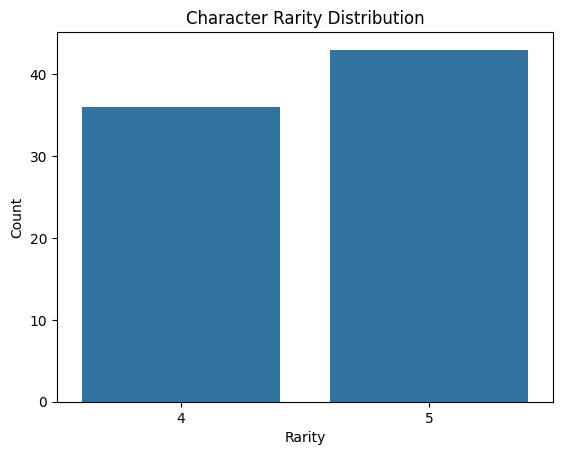

In [10]:
#First we look at distribution of character rarities
sns.countplot(x = 'rarity', data = df)
plt.title('Character Rarity Distribution')
plt.xlabel("Rarity")
plt.ylabel("Count")
plt.show()

There are two rarity levels for the 84 different characters that can be obtained in Genshin Impact, 4-star and 5-star Rarity levels. There are more 5-star characters than there are 4-star characters. There are more options available to the player for 5-star Rare characters than for 4-star characters. Since the player can't obtain any 5-star characters for free without a large time investment in the game ("farming"), this puts a lot more of the game behind a paywall essentially. We need to look at the distributions of the different Character stats as well to see how 4-star character stats measure up to the 5-star character stats.

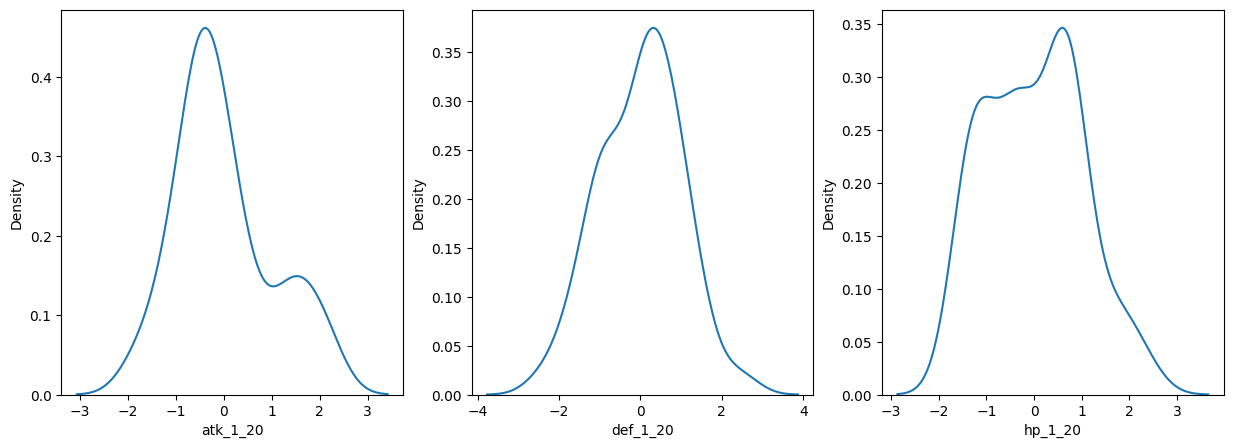

In [11]:
# Visualizing the distribution of character attack, defense, and hp stats

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

sns.kdeplot(df['atk_1_20'], ax = ax[0])
sns.kdeplot(df['def_1_20'], ax = ax[1])
sns.kdeplot(df['hp_1_20'], ax = ax[2])

plt.show()


The attack, defense, and hp stats are generally normally distributed with the highest density around the center values of the stats. The attack distribution is slightly skewed left and the hp is skewed slightly right. 

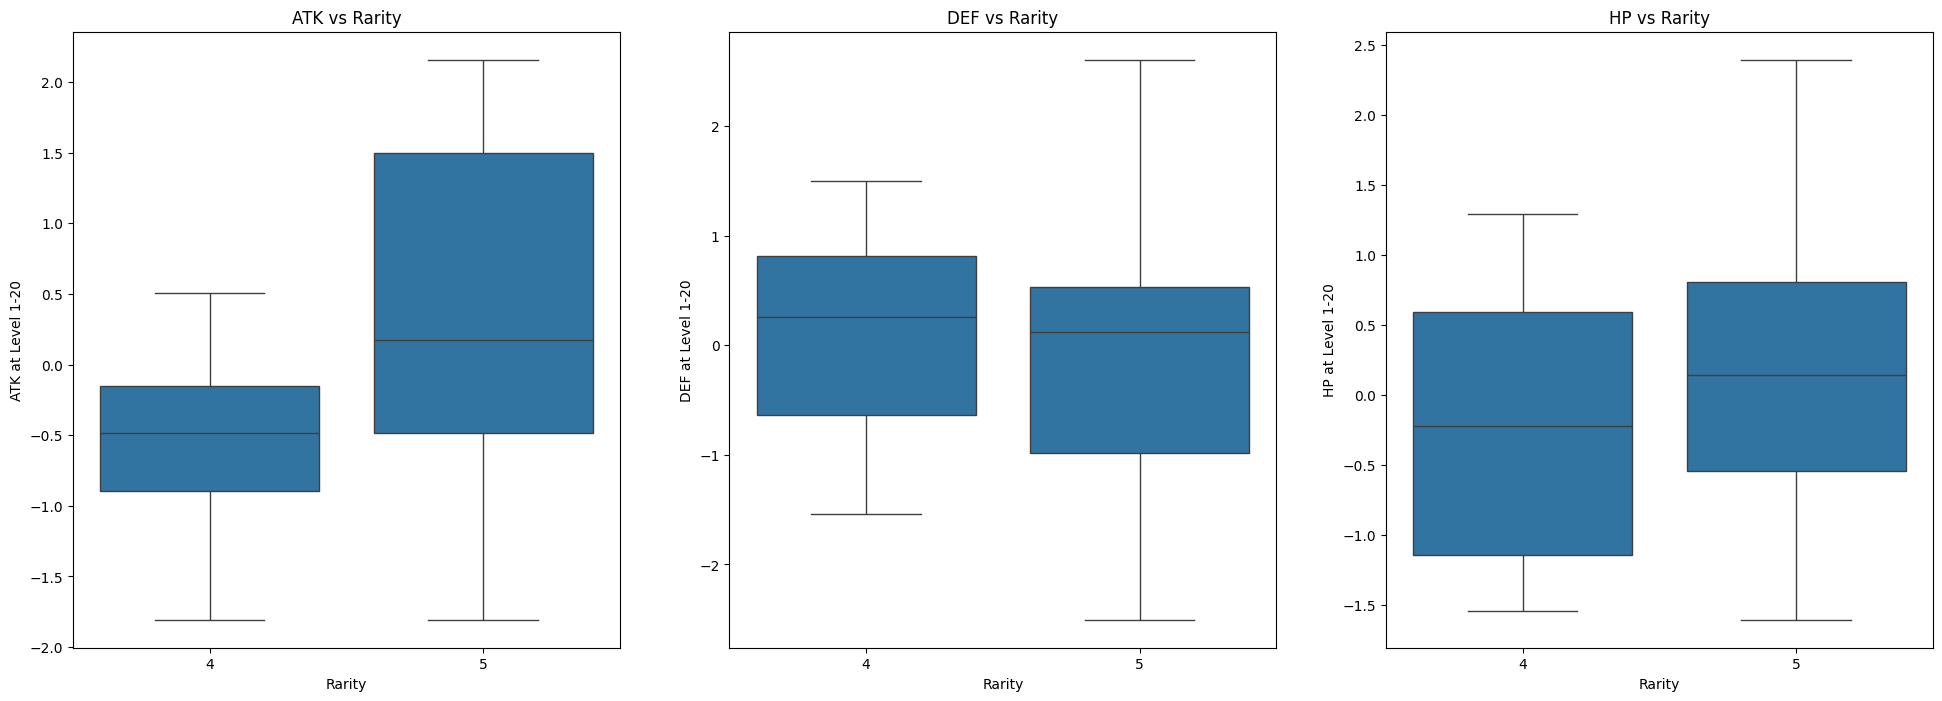

In [12]:
# Exploring relationship between rarity and the three stats using box plots
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

sns.boxplot(x='rarity', y='atk_1_20', data=df, ax=ax[0])  #First we look at attack vs. rarity relationship
ax[0].set_title('ATK vs Rarity')
ax[0].set_xlabel('Rarity')
ax[0].set_ylabel('ATK at Level 1-20')

sns.boxplot(x='rarity', y='def_1_20', data=df, ax=ax[1])  #Next we look at defense vs rarity relationship
ax[1].set_title('DEF vs Rarity')
ax[1].set_xlabel('Rarity')
ax[1].set_ylabel('DEF at Level 1-20')

sns.boxplot(x='rarity', y='hp_1_20', data=df, ax=ax[2])  #Finally we look at hp vs. rarity relationship
ax[2].set_title('HP vs Rarity')
ax[2].set_xlabel('Rarity')
ax[2].set_ylabel('HP at Level 1-20')

plt.show()

So these box plots show that 5-star rarity characters have an edge over the 4-star characters in both attack and hp stats. Defense stats seem to be slightly higher though for 4-star rarity characters. This shows that overall for most useful tanky characters are 5-star rarity. Since it is almost if not entirely impossible to obtain all characters for free, this shows that the best characters 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a33352d-fbe3-4292-b41a-6d7165c2809b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>